In [1]:
# https://www.yutaka-note.com/entry/matplotlib_inline
%matplotlib inline

In [2]:
import collections
import csv
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pycircos
from collections import Counter
from IPython.display import display
Garc    = pycircos.Garc
Gcircle = pycircos.Gcircle

In [3]:
#organism = "human"
df = pd.read_csv("../data/chromosome/chromosome_human.tsv", sep='\t')
df_subset = df[['chr', 'start', 'end']].copy()
df_subset['chr'] = 'H_' + df_subset['chr'].astype(str)
df_subset['organism'] = 'human'# assign the tag


# organism = "rice"
df1 = pd.read_csv("../data/chromosome/chromosome_rice.tsv", sep='\t')
df1_subset = df1[['chr', 'start', 'end']].copy()
df1_subset['chr'] = 'R_' + df1_subset['chr'].astype(str)    
df1_subset['organism'] = 'rice'# assign the tag
combined_df = pd.concat([df_subset, df1_subset])
combined_df.reset_index(drop=True, inplace=True)

display(combined_df)

,chr,start,end,organism
0,H_1,1,248956422,human
1,H_2,1,242193529,human
2,H_3,1,198295559,human
3,H_4,1,190214555,human
4,H_5,1,181538259,human
5,H_6,1,170805979,human
6,H_7,1,159345973,human
7,H_8,1,145138636,human
8,H_9,1,138394717,human
9,H_10,1,133797422,human


In [4]:
# Initialize
circle = Gcircle(figsize=(15,15))

# Set Chromosome Data
n = 935
m = 985

# Read the combined DataFrame
for index, row in combined_df.iterrows():
    name = row['chr']
    length = row['end']
    organism = row['organism']
    
    # get the chromosome number
    chrom_number_str = name.split('_')[1] # "H_1" -> "1"
    
    try:
        chrom_number = int(chrom_number_str)
        if organism == 'human':
            color = plt.cm.Blues(chrom_number / 24)  # change the color dynamically based on 22+X+Y
        else:
            color = plt.cm.Greens(chrom_number / 14)  # change the color dynamically based on 12+X+Y
    except ValueError:  # if chrom_number is not a number
        if chrom_number_str == "X":
            color = plt.cm.Blues(23 / 24)
        elif chrom_number_str == "Y":
            color = plt.cm.Blues(24 / 24)
        elif chrom_number_str == "Mt":
            color = plt.cm.Greens(13 / 14)
        elif chrom_number_str == "Pt":
            color = plt.cm.Greens(14 / 14)
        else:
            color = 'grey'
    
    arc = Garc(arc_id=name, 
               size=length, 
               interspace=0.5, 
               raxis_range=(n, m), 
               labelposition=int(30 + (m-n)/2),
               labelsize=7,
               label_visible=True,
               facecolor=color)
    circle.add_garc(arc)

<Figure size 1500x1500 with 0 Axes>

In [5]:
circle.set_garcs(0,360)

In [6]:
for arc_id in circle.garc_dict:
    circle.tickplot(arc_id, 
                    raxis_range=(985,1000), 
                    tickinterval=20000000, 
                    ticklabels=None) 

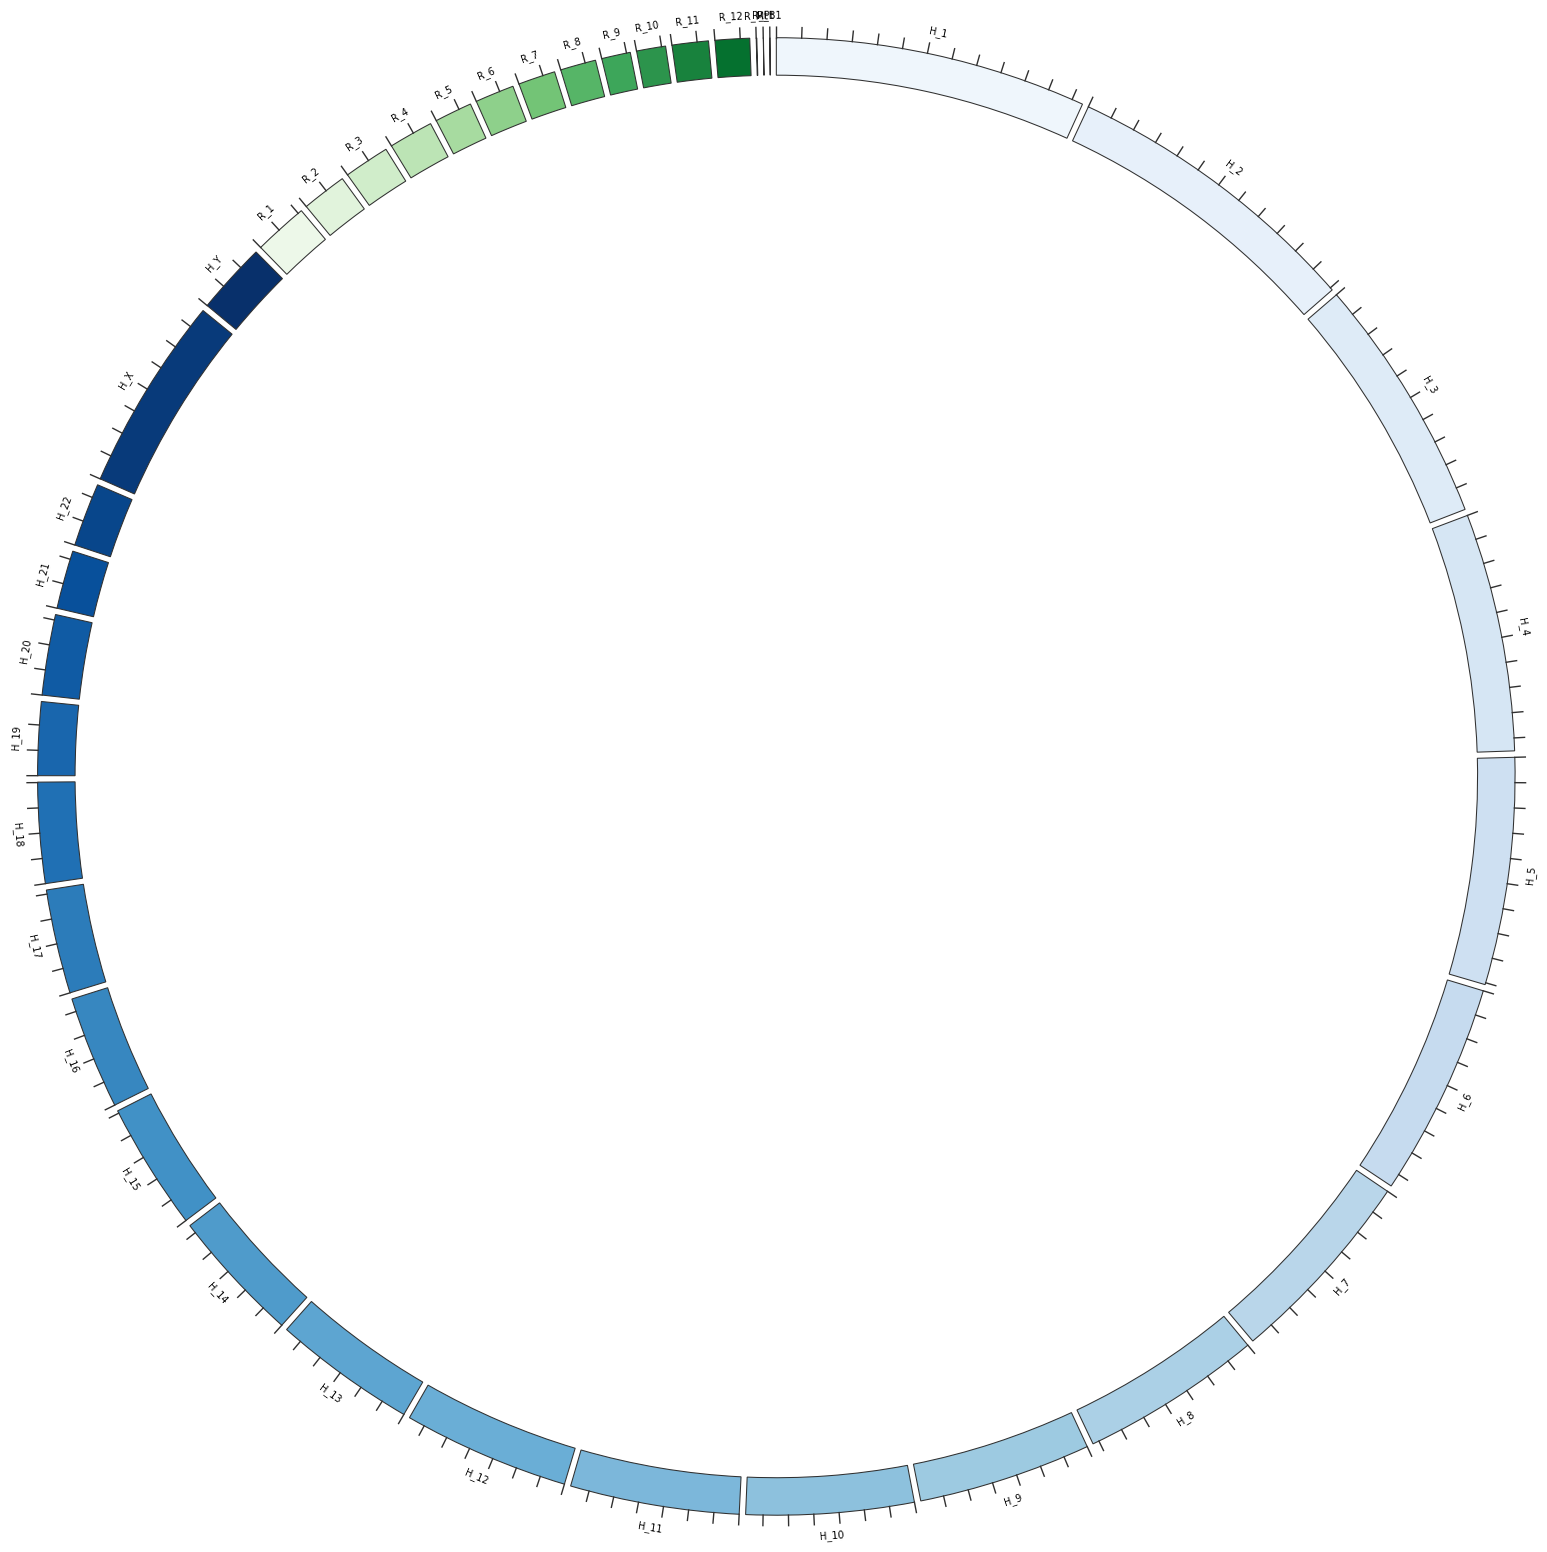

In [7]:
circle.figure

## Scatter plot of human vs rice upregulated genes

In [8]:
combined_df_score = pd.read_csv("../data/circos_hr_UP_2311/combined_position_up.tsv", sep='\t')
display(combined_df_score)

,Gene stable ID,Chromosome/scaffold name,HN-score(HN5),organism,Gene start (bp),Gene end (bp)
0,ENSG00000173110,H_1,245,human,161524540.0,161526894.0
1,ENSG00000204389,H_6,239,human,31815543.0,31817946.0
2,ENSG00000204388,H_6,231,human,31827738.0,31830254.0
3,ENSG00000132002,H_19,210,human,14514769.0,14560391.0
4,ENSG00000151929,H_10,181,human,119651380.0,119677819.0
...,...,...,...,...,...,...
584,Os03g0820400,R_3,42,rice,34427704.0,34428391.0
585,Os10g0328600,R_10,42,rice,9212944.0,9216458.0
586,Os01g0971800,R_1,42,rice,42874273.0,42875515.0
587,Os07g0621600,R_7,42,rice,25691906.0,25692138.0


In [9]:
# Initialize
arcdata_dict = collections.defaultdict(dict)

for index, row in combined_df_score.iterrows():
    name = row['Chromosome/scaffold name']
    start = row['Gene start (bp)']
    end = row['Gene end (bp)']
    mid = (start + end) // 2
    value = row['HN-score(HN5)']

    if name not in arcdata_dict: # if the key is not in the dictionary, add it
        arcdata_dict[name]["positions"] = []
        arcdata_dict[name]["values"] = []

    arcdata_dict[name]["positions"].append(mid)
    arcdata_dict[name]["values"].append(value)


# plot
vmin, vmax = combined_df_score['HN-score(HN5)'].min(), combined_df_score['HN-score(HN5)'].max()
for key in arcdata_dict:
    circle.scatterplot(
        key,
        data=arcdata_dict[key]["values"],
        positions=arcdata_dict[key]["positions"], 
        rlim=[vmin-0.05*abs(vmin), vmax+0.05*abs(vmax)],
        raxis_range=(840, 940),
        facecolor="orangered",
        edgecolor="black",
        spine=True
    )

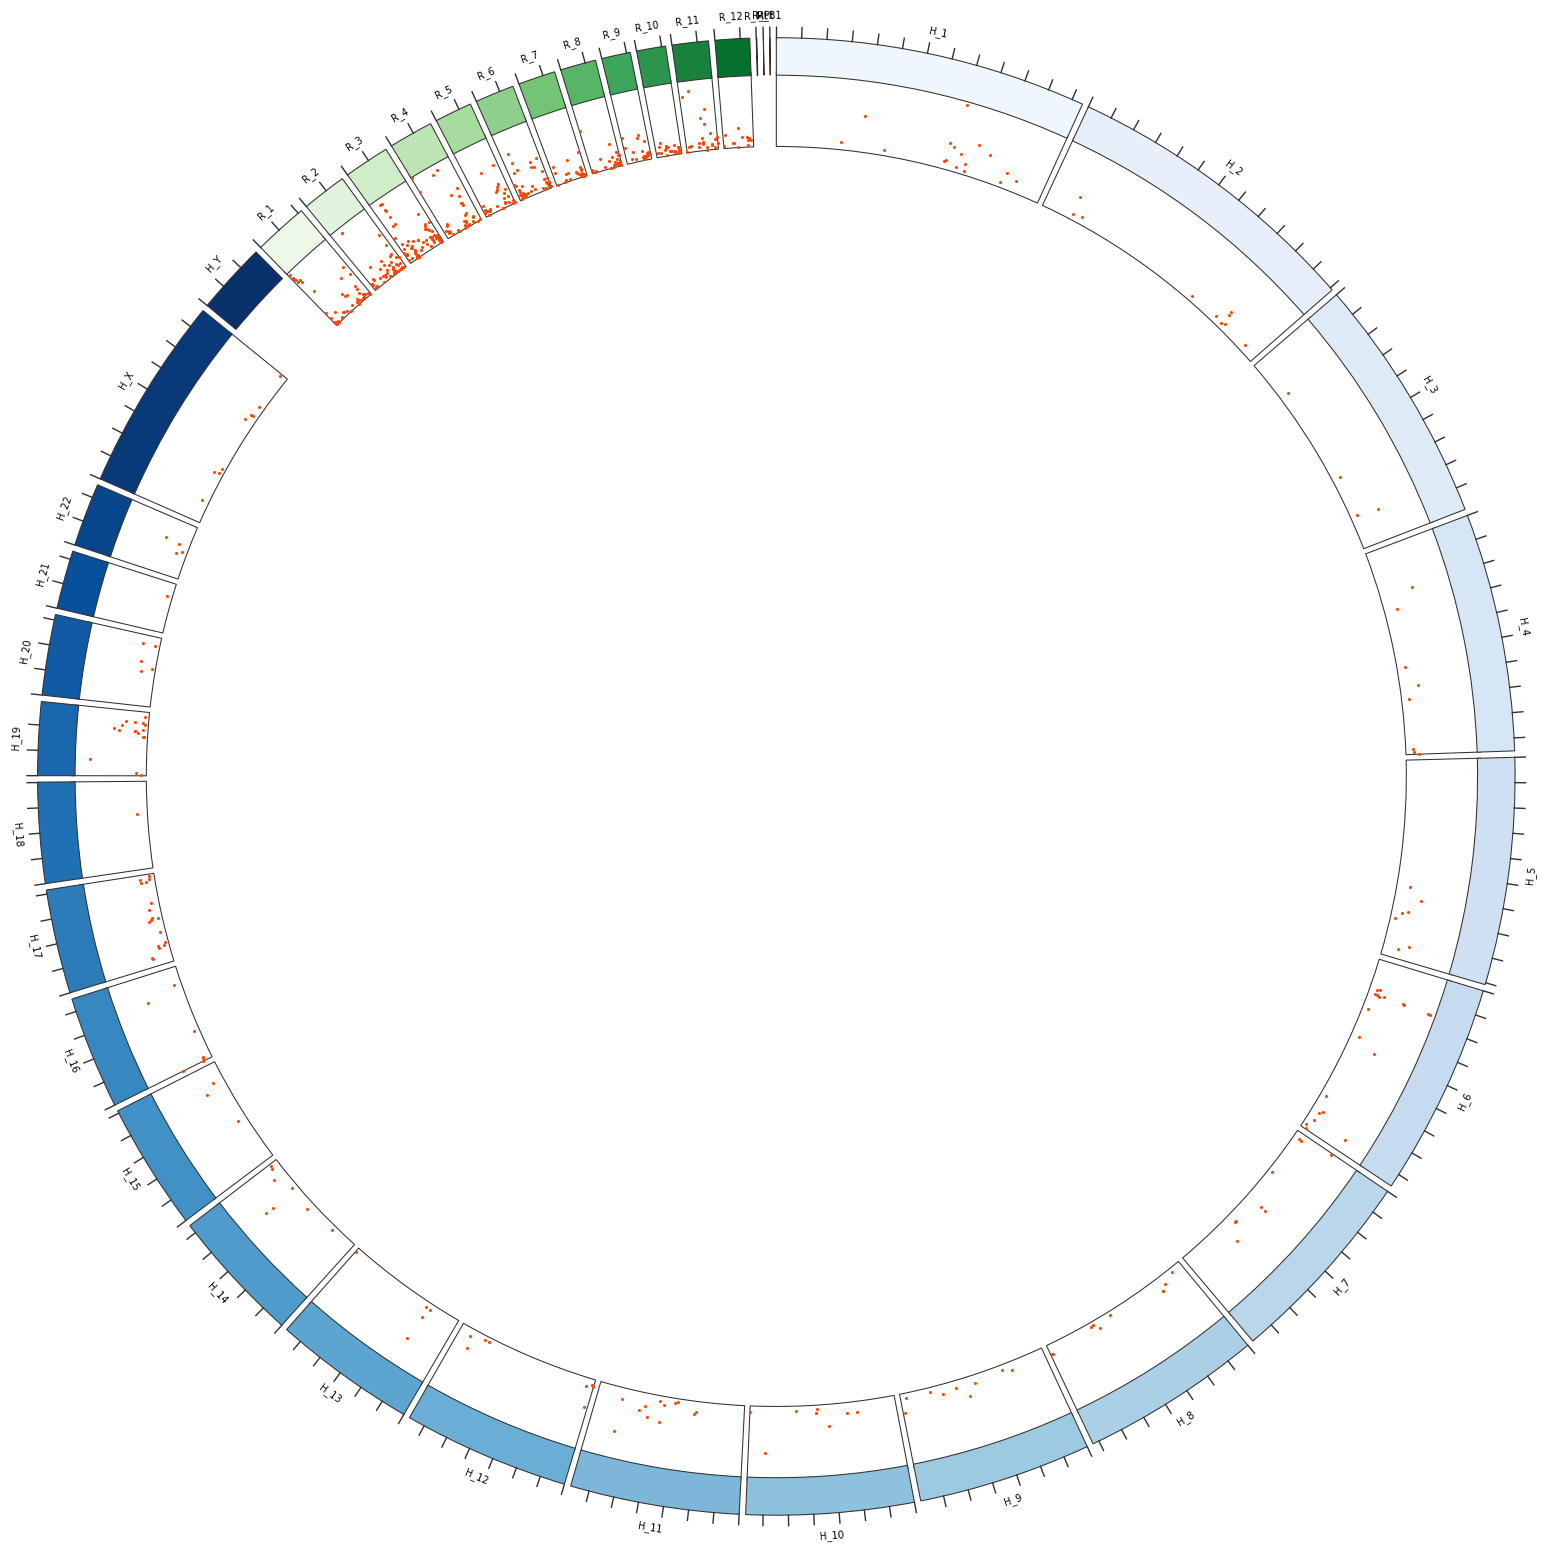

In [10]:
circle.figure

## linkplot of GOslim terms for human vs rice upregulated genes

In [11]:
merged_df_goslim_sorted = pd.read_csv("../data/circos_hr_UP_2311/combined_goslim_UP.tsv", sep='\t')
display(merged_df_goslim_sorted)

,GOSlim GOA Accession(s),GOSlim GOA Description,GOSlim_domain,Gene stable ID_rice,Gene stable ID_human,Chromosome/scaffold name_rice,start1 (bp),end1 (bp),Chromosome/scaffold name_human,start2 (bp),end2 (bp),HN-score(HN5)_rice,HN-score(HN5)_human
0,GO:0003824,catalytic activity,molecular_function,Os04g0167875,ENSG00000178297,R_4,4644736,4644996,H_19,2360238,2426261,57,72
1,GO:0003824,catalytic activity,molecular_function,Os05g0135400,ENSG00000143199,R_5,2073613,2075302,H_1,167809386,167914215,61,97
2,GO:0003824,catalytic activity,molecular_function,Os02g0164000,ENSG00000143199,R_2,3441185,3446850,H_1,167809386,167914215,48,97
3,GO:0003824,catalytic activity,molecular_function,Os08g0473900,ENSG00000143199,R_8,23341289,23343299,H_1,167809386,167914215,48,97
4,GO:0003824,catalytic activity,molecular_function,Os09g0315700,ENSG00000143199,R_9,8692296,8697399,H_1,167809386,167914215,49,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15167,GO:0005198,structural molecule activity,molecular_function,Os01g0105800,ENSG00000184697,R_1,306871,308842,H_16,3014712,3020071,53,65
15168,GO:0005777,peroxisome,cellular_component,Os07g0529000,ENSG00000165507,R_7,20691213,20693521,H_10,44970981,44978809,59,70
15169,GO:0005777,peroxisome,cellular_component,Os06g0253100,ENSG00000165507,R_6,7940956,7941680,H_10,44970981,44978809,129,70
15170,GO:0045182,translation regulator activity,molecular_function,Os05g0373900,ENSG00000183655,R_5,18016742,18020353,H_15,85759326,85794925,42,74


In [12]:
# Add color data to 'GOSlim GOA Description' column
unique_ontologies = merged_df_goslim_sorted['GOSlim GOA Description'].unique()

n = len(unique_ontologies)
colors = cm.rainbow(np.linspace(0, 1, n)) # create n colors by cm.rainbow

# create ontology_color_dict
ontology_color_dict = {term: color for term, color in zip(unique_ontologies, colors)}

# add to garc_dict
for term, color in ontology_color_dict.items():
    circle._garc_dict[term] = {'facecolor': color, 'edgecolor': color}

In [14]:
values_all   = [] 
arcdata_dict = collections.defaultdict(dict)

# Count the number of ontology terms
ontology_count = Counter()
for index, row in merged_df_goslim_sorted.iterrows():
    ontology = row['GOSlim GOA Description']
    ontology_count[ontology] += 1

min_linewidth = 1 * 10**-40
max_linewidth = 0.002

min_count = min(ontology_count.values())
max_count = max(ontology_count.values())

for index, row in merged_df_goslim_sorted.iterrows():
    name1 = row['Chromosome/scaffold name_rice'] # rice
    start1 = int(row['start1 (bp)'])
    end1 = int(row['end1 (bp)'])
    name2 = row['Chromosome/scaffold name_human'] # human
    start2 = int(row['start2 (bp)'])
    end2 = int(row['end2 (bp)'])
    ontology = row['GOSlim GOA Description']


    count = ontology_count[ontology]
    linewidth = min_linewidth + (max_linewidth - min_linewidth) * ((count - min_count) / (max_count - min_count))
        
    source = (name1, start1, end1, 840)
    destination = (name2, start2, end2, 840)
    circle.chord_plot(source, 
                        destination, 
                        facecolor=circle._garc_dict[ontology]['facecolor'],
                        linewidth=linewidth,
                        edgecolor=circle._garc_dict[ontology]['edgecolor']
                )

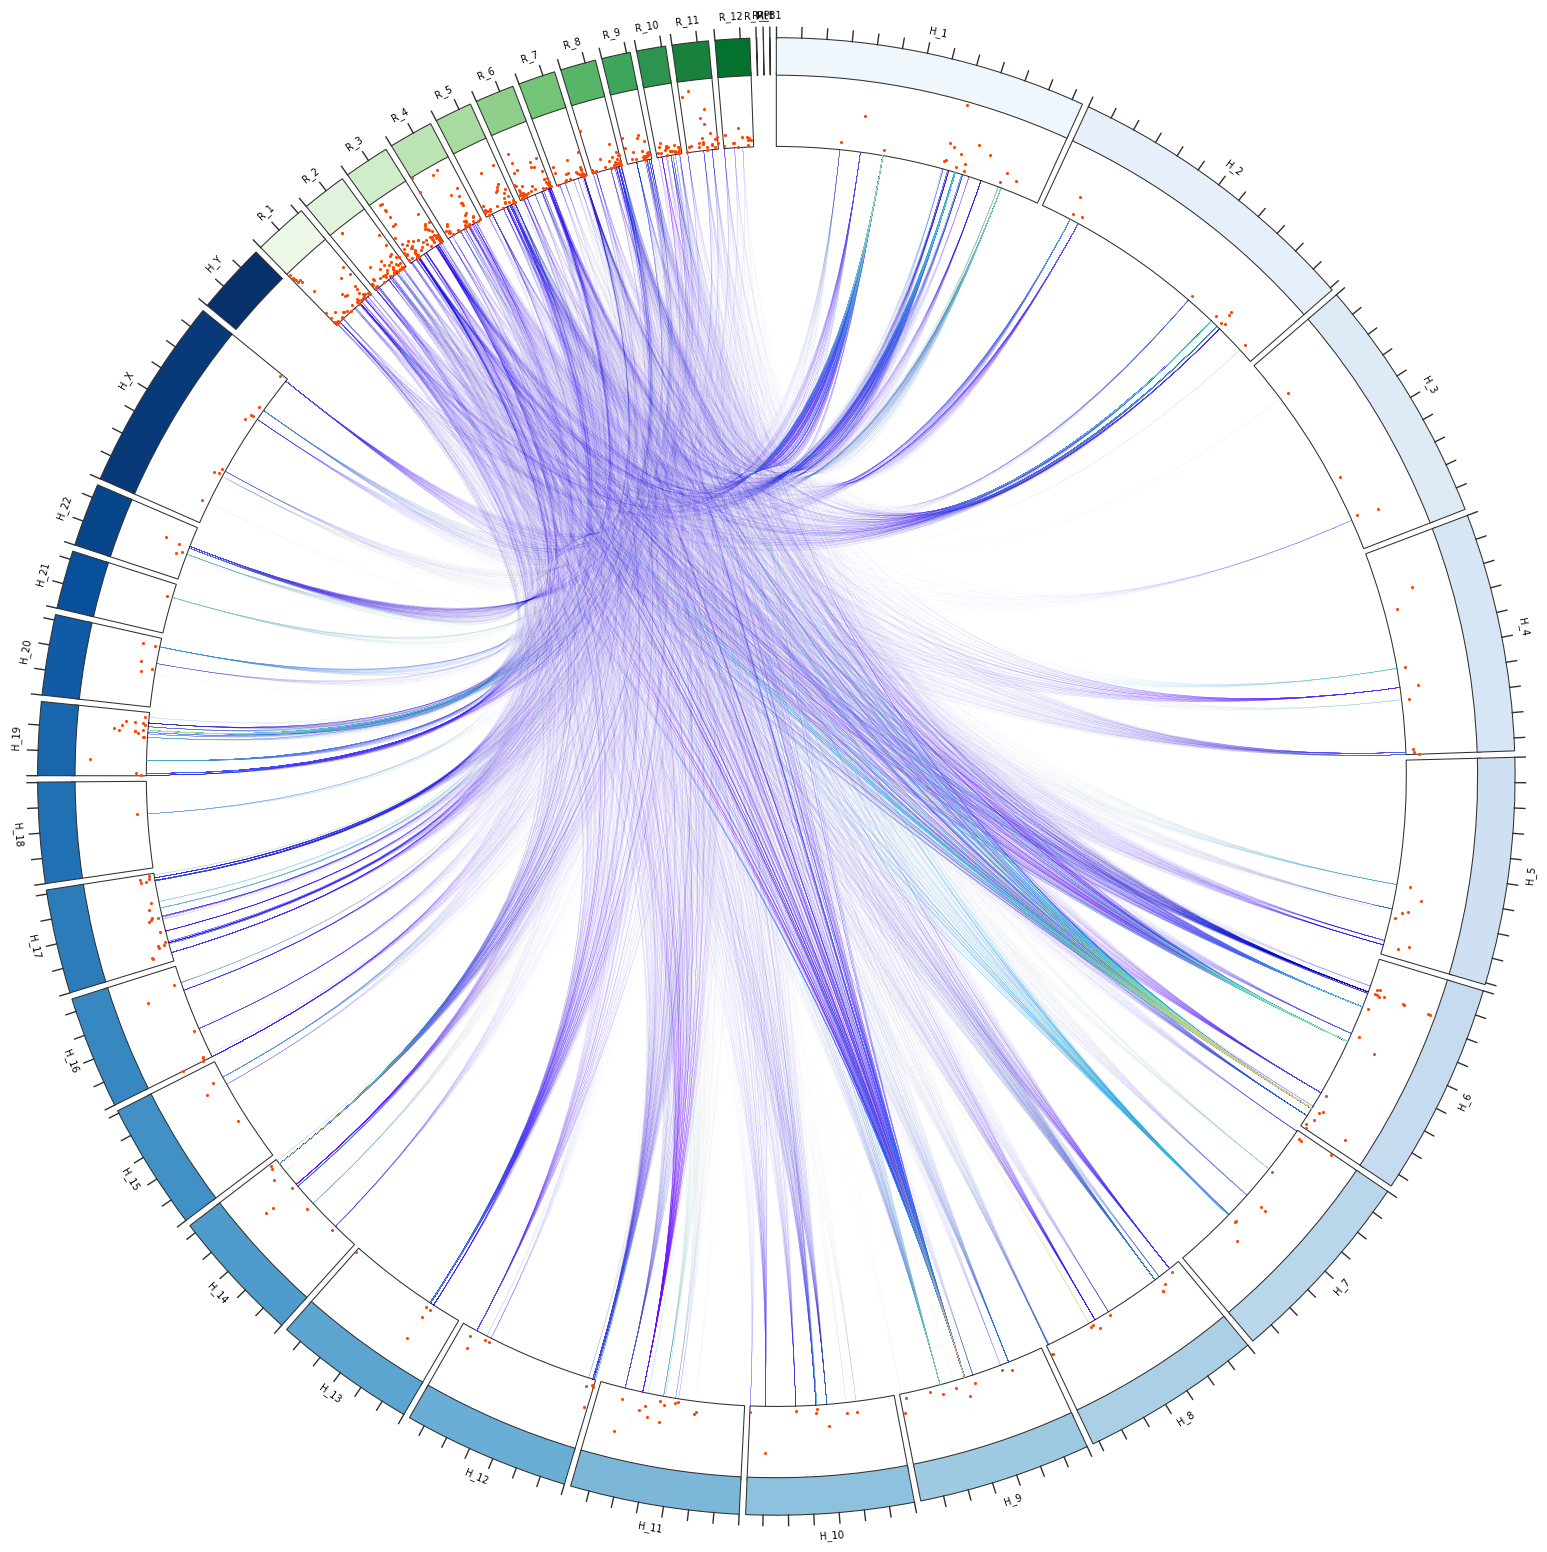

In [15]:
circle.figure